# Predicting House Prices

For more information regarding this dataset, visit: 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

This script will contain an initial exploration of the data, followed by some necessary preprocessing, 
feature enineering and selection, and finally the models and results.

## Some general information regarding the data

The data is a set especially put together for learning machine learning techniques. The main purpose is to predict the price of a house. There are 80 features provided which can help estimating the price. There are a total of 1460 observations to build model with. These will be tested on a set of 1459 observations. Lets start by importing the dataset and looking at the different features we are working with in general.


In [1]:
#call libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
import seaborn as sns

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (6.5, 5.0)

#Turn off pandas warning for changing variables & future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
#set random seed
np.random.seed(123)

In [3]:
#Import dataset and look at what information we are dealing with
houses = pd.read_csv("C:\\Users\\Jeroen\\Desktop\\Kaggle Datasets\\House Prices\\Excel Files\\train.csv", header = 0)
houses.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### What does it mean!?!?!?

There are clearly many values that do not make sense for now. The meaning of all values are explained in the textfile which accompanied the dataset. Let's first check the dimensions of this dataset


In [4]:
#Look at how much data we are exactly dealing with
print("The data contains", houses.shape[0],"rows and", houses.shape[1],
      "columns. That equals", houses.size,"different cells with data")

The data contains 1460 rows and 81 columns. That equals 118260 different cells with data


## Wow!
That's a lot of data. From the header it seems that some columns contain many NaN's, which seems logical considering that not every house has certain features. Lets see what columns contain how many NaN's:

In [5]:
columns_na = houses.isna().sum()
columns_na[columns_na > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
#There are many NA's in several categories which are not really NA's. Let's adress this. 

#Alley
houses["Alley"] = houses["Alley"].fillna(value = "NoAlley")

#Basement
houses["BsmtQual"] = houses["BsmtQual"].fillna(value = "NoBsmt")
houses["BsmtQual"] = houses["BsmtQual"].fillna(value = "NoBsmt")
houses["BsmtExposure"] = houses["BsmtExposure"].fillna(value = "NoBsmt")
houses["BsmtFinType1"] = houses["BsmtFinType1"].fillna(value = "NoBsmt")
houses["BsmtFinType2"] = houses["BsmtFinType2"].fillna(value = "NoBsmt")
houses["BsmtCond"] = houses["BsmtCond"].fillna(value = "NoBsmt")

#Fireplace
houses["FireplaceQu"] = houses["FireplaceQu"].fillna(value = "NoFirePlace")

#Garage
houses["GarageType"] = houses["GarageType"].fillna(value = "NoGarage")
houses["GarageYrBlt"] = houses["GarageYrBlt"].fillna(value = "NoGarage")
houses["GarageFinish"] = houses["GarageFinish"].fillna(value = "NoGarage")
houses["GarageQual"] = houses["GarageQual"].fillna(value = "NoGarage")
houses["GarageCond"] = houses["GarageCond"].fillna(value = "NoGarage")

#Pool
houses["PoolQC"] = houses["PoolQC"].fillna(value = "NoPool")

#Fence
houses["Fence"] = houses["Fence"].fillna(value = "NoFence")

#Misc
houses["MiscFeature"] = houses["MiscFeature"].fillna(value = "NoMisc")

In [7]:
columns_na = houses.isna().sum()
columns_na[columns_na > 0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

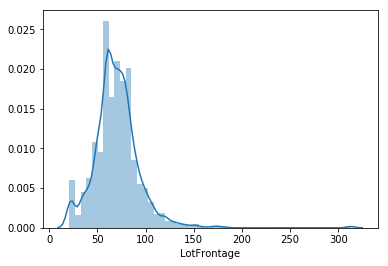

In [8]:
LotsFrontage_noNA = (houses["LotFrontage"]).isna()
LotsFrontage_noNA = houses[LotsFrontage_noNA == False]
LotsFrontage_noNA = (LotsFrontage_noNA["LotFrontage"])
sns.distplot(LotsFrontage_noNA)

In [9]:
#replace LotFrontage NA's with mean depending on MSSubClass and MSZoning  
#First group by MSSubClass & MSZoning
Grouped_LotFrontages = houses.groupby(['MSSubClass', 'MSZoning']).mean()

#only specify LotFrontage in the dataset
Grouped_LotFrontages = pd.DataFrame(Grouped_LotFrontages.iloc[:, 1])

#Change index to sequential nr
Grouped_LotFrontages['index1'] = Grouped_LotFrontages.index
Grouped_LotFrontages.index = range(0, len(Grouped_LotFrontages))

#Specify columns for MSSubClass and MSZoning
Grouped_LotFrontages['MSSubClass'] = Grouped_LotFrontages['index1'].str[0]
Grouped_LotFrontages['MSZoning'] = Grouped_LotFrontages['index1'].str[1]
Grouped_LotFrontages = Grouped_LotFrontages.drop(columns = "index1")


In [10]:
#Split the dataframe into a part with NA's and without
LotsFrontage_noNA = (houses["LotFrontage"]).isna()
LotsFrontage_NA = houses[LotsFrontage_noNA == True]
LotsFrontage_noNA = houses[LotsFrontage_noNA == False]


In [11]:
# Add the grouped values to the dataframe with NA's and fill NA's
Grouped_LotFrontages = Grouped_LotFrontages.rename(columns={'LotFrontage':'New_LotFrontage'})
LotsFrontage_NA = LotsFrontage_NA.merge(Grouped_LotFrontages, on=['MSZoning', 'MSSubClass'], how='left')
LotsFrontage_NA["LotFrontage"] = LotsFrontage_NA["New_LotFrontage"]
LotsFrontage_NA = LotsFrontage_NA.drop(columns = "New_LotFrontage")

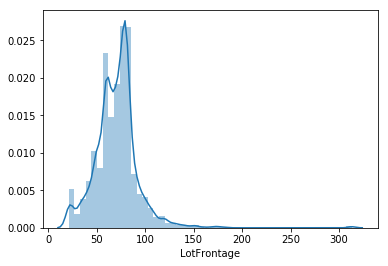

In [12]:
#combine the 2 dataframes back together again
houses = pd.concat([LotsFrontage_NA, LotsFrontage_noNA])
sns.distplot(houses["LotFrontage"])

In [13]:
#For the other columns with NA's, impede by their most frequent value or 0
cols_with_missing1 = [col for col in houses.columns if houses[col].isnull().any()]
for col in cols_with_missing1:
    if houses[col].dtype == np.dtype('O'):
         houses[col]= houses[col].fillna(houses[col].value_counts().index[0]) 
   #replace nan with most frequent
    else:
        houses[col] = houses[col].fillna(0) 
cols_with_missing1 = [col for col in houses.columns if houses[col].isnull().any()]

In [14]:
#Turn all categories into numerical values so a random forest can be used
houses_dt = houses
dt_columns = houses_dt.columns
for col in dt_columns:
    if houses_dt[col].dtype == np.dtype('O'):
        houses_dt[col] = pd.Categorical(houses_dt[col])
        houses_dt[col] = houses_dt[col].cat.codes

In [15]:
#Tree packages for checking the feature importance
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor() 

train_dt_x = houses_dt.loc[:, houses_dt.columns != 'SalePrice']
# Build a decision tree and compute the feature importances
dt.fit(train_dt_x, houses_dt["SalePrice"]) 

feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = train_dt_x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print(feature_importances)

                 importance
OverallQual    6.361709e-01
GrLivArea      1.036905e-01
2ndFlrSF       3.760607e-02
TotalBsmtSF    3.208637e-02
1stFlrSF       2.214920e-02
BsmtFinSF1     2.090288e-02
Neighborhood   1.467163e-02
GarageCars     1.270953e-02
GarageArea     1.011479e-02
LotFrontage    8.994474e-03
BsmtUnfSF      8.241720e-03
CentralAir     6.434221e-03
MasVnrType     6.007774e-03
YearBuilt      5.889845e-03
KitchenAbvGr   5.803274e-03
GarageType     5.597419e-03
LotArea        5.343224e-03
SaleCondition  3.636058e-03
WoodDeckSF     3.434795e-03
YearRemodAdd   3.387588e-03
BsmtExposure   3.154876e-03
OverallCond    3.082003e-03
ExterQual      2.695110e-03
Exterior1st    2.674259e-03
MoSold         2.587142e-03
GarageYrBlt    2.576058e-03
BsmtCond       2.368331e-03
FullBath       2.356093e-03
OpenPorchSF    2.140949e-03
Id             2.138147e-03
...                     ...
LotShape       4.056086e-04
PavedDrive     4.051547e-04
Fireplaces     4.012679e-04
Fence          3.221

### Overall Quality!
Who would have guessed! Overall quality is the best predictor for house prices. Also the living area in square feet seem usefull. What a surprise! Lets compare how the values of these 3 variables are distributed over the observations!

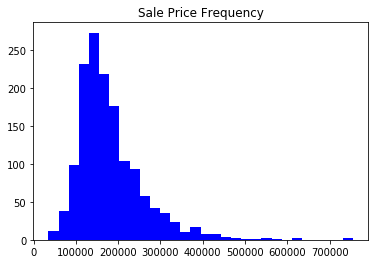

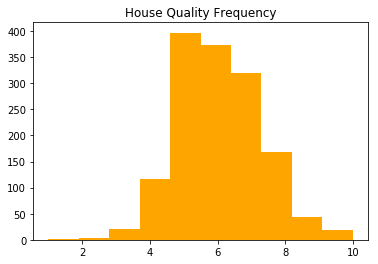

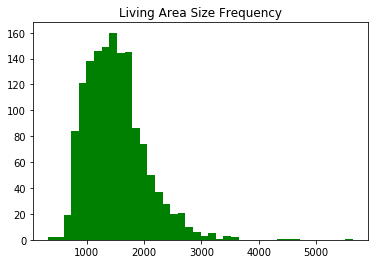

In [16]:
#Plot a histogram for saleprice
plt.hist(houses["SalePrice"], bins = 30, color = "blue")
plt.title("Sale Price Frequency")
plt.show()

#Plot a histogram for the overall quality grades
plt.hist(houses["OverallQual"], bins = 10,  color = "orange")
plt.title("House Quality Frequency")
plt.show()

#Plot a histogram for size of the living area
plt.hist(houses["GrLivArea"], bins = 40, color = "green")
plt.title("Living Area Size Frequency")
plt.show()


In [17]:
houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,8,60,3,81.621359,10382,1,1,0,3,0,...,0,3,4,3,350,11,2009,8,4,200000
1,13,20,3,78.065693,12968,1,1,1,3,0,...,0,3,4,1,0,9,2008,8,4,144000
2,15,20,3,78.065693,10920,1,1,0,3,0,...,0,3,1,1,0,5,2008,8,4,157000
3,17,20,3,78.065693,11241,1,1,0,3,0,...,0,3,4,3,700,3,2010,8,4,149000
4,25,20,3,78.065693,8246,1,1,0,3,0,...,0,3,2,1,0,5,2010,8,4,154000
5,32,20,3,78.065693,8544,1,1,0,3,0,...,0,3,2,1,0,6,2008,8,4,149350
6,43,85,3,71.571429,9180,1,1,0,3,0,...,0,3,2,1,0,12,2007,8,4,144000
7,44,20,3,78.065693,9200,1,1,0,3,0,...,0,3,2,1,0,7,2008,8,4,130250
8,51,60,3,81.621359,13869,1,1,1,3,0,...,0,3,4,1,0,7,2007,8,4,177000
9,65,60,3,81.621359,9375,1,1,3,3,0,...,0,3,0,1,0,2,2009,8,4,219500


In [18]:
houses_sample = pd.DataFrame()
houses_sample["LotArea"] = houses["LotArea"]
houses_sample["TotRmsAbvGrd"] = houses["TotRmsAbvGrd"]
houses_sample["OverallQual"] = houses["OverallQual"]
houses_sample["Neighborhood"] = houses["Neighborhood"]
houses_sample["OverallCond"] = houses["OverallCond"]
houses_sample["SaleCondition"] = houses["SaleCondition"]
houses_sample['SalePrice'] = houses['SalePrice']

<function matplotlib.pyplot.show(*args, **kw)>

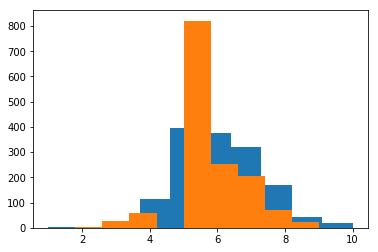

In [19]:
plt.hist(houses["OverallQual"])
plt.show

plt.hist(houses["OverallCond"])
plt.show

### Quick Tryouts
Let's run some quick regressions to see whether the full dataset is a better fit than the smaller one!

In [20]:
#Make training and testsets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(houses.loc[:, houses.columns != 'SalePrice'], houses["SalePrice"], test_size=0.3)


In [21]:
#Run a Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model2 = Lasso()
model2.fit(X=x_train, y=y_train)
y_pred2 = model2.predict(x_test)
rmse_lasso = mean_squared_error(y_pred2, y_test)
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(x_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))

Lasso RMSE: 4479685178.520491
Accuracy Lasso: 0.11781930317711053


In [22]:
#Run a Ridge Regression
from sklearn.linear_model import Ridge

model3 = Ridge(alpha = 1 , solver = "cholesky")
model3.fit(X=x_train, y=y_train)
y_pred3 = model3.predict(x_test)
rmse_ridge = mean_squared_error(y_pred3, y_test)
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model3.score(x_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))

Ridge RMSE: 2274876738.1194167
Accuracy Ridge: 0.5520104056323053


In [23]:
#Make training and testsets from the sampled columns

x_train, x_test, y_train, y_test = train_test_split(houses_sample.loc[:, houses_sample.columns != 'SalePrice'], houses_sample["SalePrice"], test_size=0.3)

In [24]:
#Run a Lasso Regression
model2 = Lasso()
model2.fit(X=x_train, y=y_train)
y_pred2 = model2.predict(x_test)
rmse_lasso = mean_squared_error(y_pred2, y_test)
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(x_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))

Lasso RMSE: 1924403583.8365307
Accuracy Lasso: 0.6858330814243092


In [25]:
#Run a Ridge Regression
model3 = Ridge(alpha = 1 , solver = "cholesky")
model3.fit(X=x_train, y=y_train)
y_pred3 = model3.predict(x_test)
rmse_ridge = mean_squared_error(y_pred3, y_test)
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model3.score(x_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))

Ridge RMSE: 1924219889.7916496
Accuracy Ridge: 0.6858630702439756
